<a href="https://colab.research.google.com/github/ianuragbhatt/time-series-tutorials/blob/main/data-preparation/02_tsf_web_traffic_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset from Kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c web-traffic-time-series-forecasting

 99% 577M/583M [00:04<00:00, 122MB/s]
100% 583M/583M [00:04<00:00, 142MB/s]


In [ ]:
!unzip -u "/content/web-traffic-time-series-forecasting.zip" -d "dataset"

Archive:  /content/web-traffic-time-series-forecasting.zip
  inflating: dataset/key_1.csv.zip   
  inflating: dataset/key_2.csv.zip   
  inflating: dataset/sample_submission_1.csv.zip  
  inflating: dataset/sample_submission_2.csv.zip  
  inflating: dataset/train_1.csv.zip  
  inflating: dataset/train_2.csv.zip  


# Load Dataset

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train1 = pd.read_csv("/content/dataset/train_1.csv.zip", parse_dates=True)

In [ ]:
train1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
train1.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

# Data Visualization

In [ ]:
train_pivot = train1.melt(id_vars='Page', var_name='Date', value_name='Visits')

Pandas.melt() unpivots a DataFrame from wide format to long format

In [ ]:
train_pivot.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [ ]:
train_pivot['Date'] = pd.to_datetime(train_pivot['Date'])

In [ ]:
train_pivot['Year'] = train_pivot['Date'].dt.year
train_pivot['Month'] = train_pivot['Date'].dt.month
train_pivot['Day'] = train_pivot['Date'].dt.day

In [ ]:
train_pivot.head()

,Page,Date,Visits,Year,Month,Day
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN,2015,7,1


In [ ]:
def visualize_visits(df, groupby, figsize, title, **kwargs):
    plt.figure(figsize=figsize)
    group_by = df[[groupby, 'Visits', 'Page']].groupby([groupby])['Visits'].mean()
    plt.plot(group_by, **kwargs)
    plt.title(title)
    plt.show()

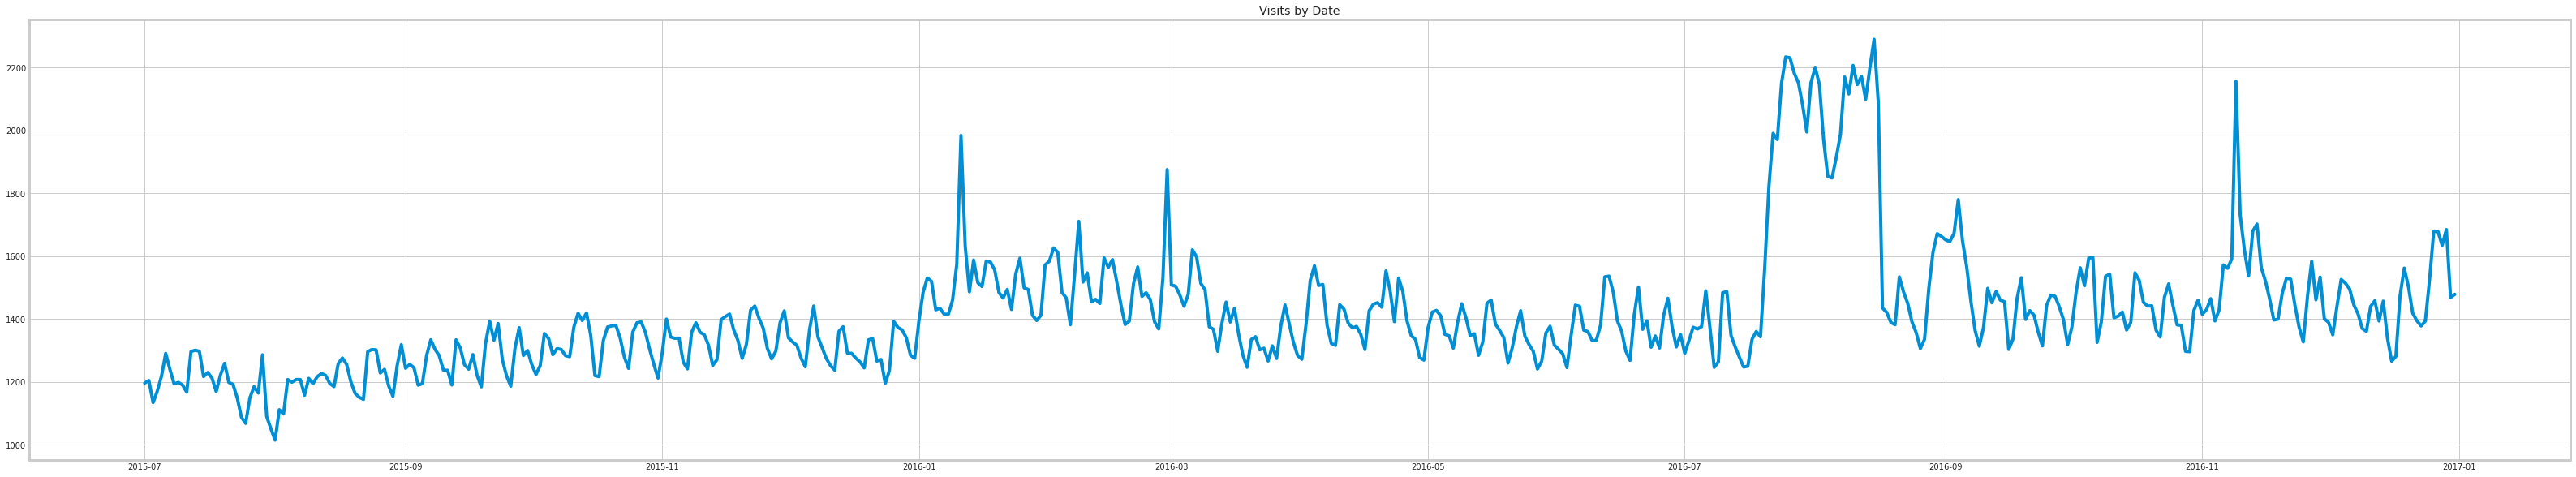

In [ ]:
visualize_visits(train_pivot, 'Date', (50, 10), 'Visits by Date')

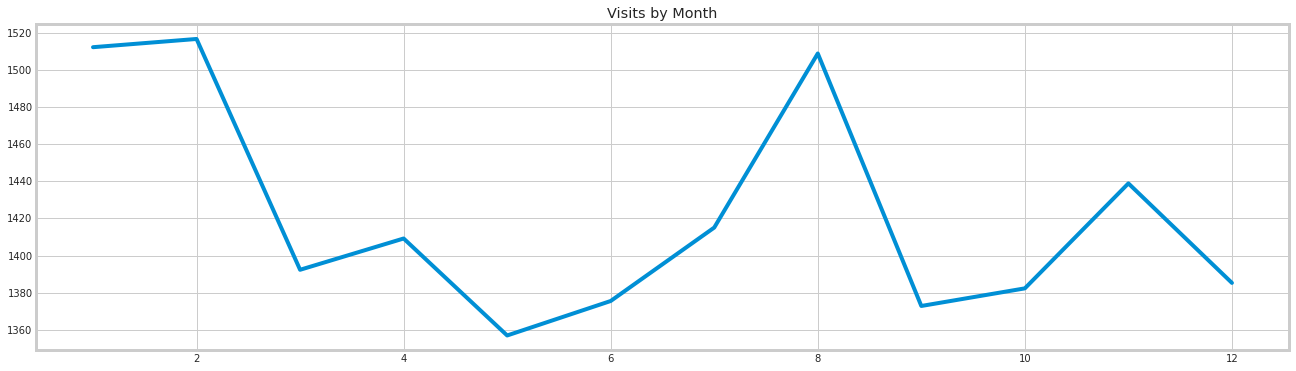

In [ ]:
visualize_visits(train_pivot, 'Month', (20, 6), title='Visits by Month')

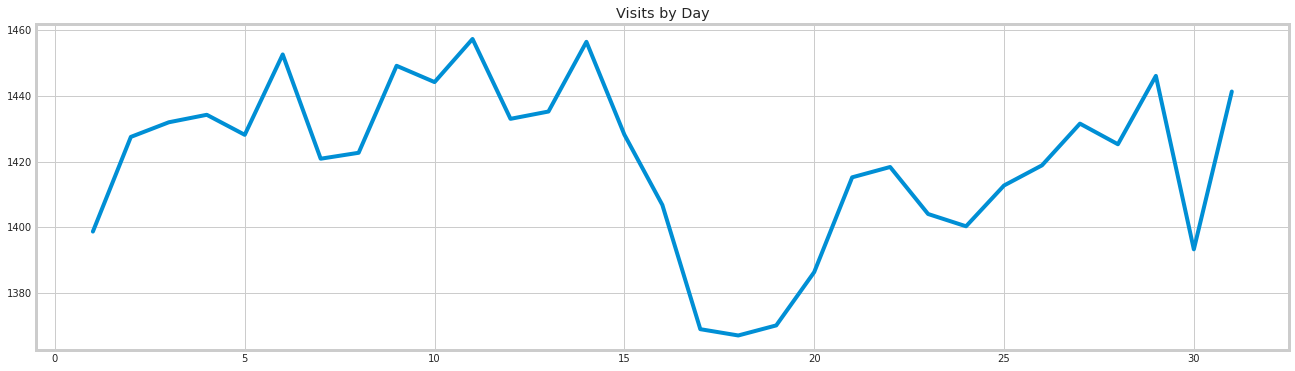

In [ ]:
visualize_visits(train_pivot, 'Day', (20, 6), 'Visits by Day')

## Page with most Visits

In [ ]:
page_visits = train_pivot[['Page', 'Visits']].groupby('Page')['Visits'].sum().sort_values(ascending=False)
page_visit = pd.DataFrame({'Page':page_visits.index, 'Visits':list(page_visits)})

In [ ]:
page_visit.head()

,Page,Visits
0,Main_Page_en.wikipedia.org_all-access_all-agents,1.206618e+10
1,Main_Page_en.wikipedia.org_desktop_all-agents,8.774497e+09
2,Main_Page_en.wikipedia.org_mobile-web_all-agents,3.153985e+09
3,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,1.603934e+09
4,Special:Search_en.wikipedia.org_all-access_all...,1.304079e+09


In [ ]:
name = []
for page in page_visit['Page']:
    split = page.split('.')
    name.append(split[-3])

In [ ]:
page_visit['Name'] = name
page_visit['Language'] = page_visit['Name'].str[-2:]

In [ ]:
page_visit.head()

,Page,Visits,Name,Language
0,Main_Page_en.wikipedia.org_all-access_all-agents,1.206618e+10,Main_Page_en,en
1,Main_Page_en.wikipedia.org_desktop_all-agents,8.774497e+09,Main_Page_en,en
2,Main_Page_en.wikipedia.org_mobile-web_all-agents,3.153985e+09,Main_Page_en,en
3,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,1.603934e+09,Wikipedia:Hauptseite_de,de
4,Special:Search_en.wikipedia.org_all-access_all...,1.304079e+09,Special:Search_en,en


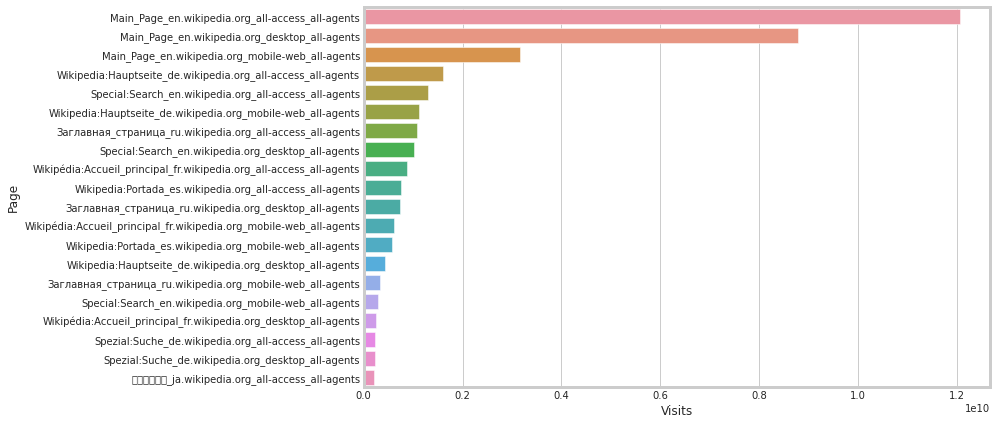

In [ ]:
plt.figure(figsize=(10, 7))
top=20
top_visit = page_visit.iloc[:top]
sns.barplot(data=top_visit, y='Page', x='Visits')

## Visualize Access agent, Language and project

In [ ]:
name = []
project = []
access_agent = []

for page in train1['Page']:
    split = page.split('.')
    name.append(split[-3])
    project.append(split[-2])
    access_agent.append(split[-1])

In [ ]:
train1['Name'] = name
train1['Project'] = project
train1['access_agent'] = access_agent
train1['Language'] = train1['Name'].str[-2:]

In [ ]:
train1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Name,Project,access_agent,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1_zh,wikipedia,org_all-access_spider,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM_zh,wikipedia,org_all-access_spider,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C_zh,wikipedia,org_all-access_spider,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute_zh,wikipedia,org_all-access_spider,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You_zh,wikipedia,org_all-access_spider,zh


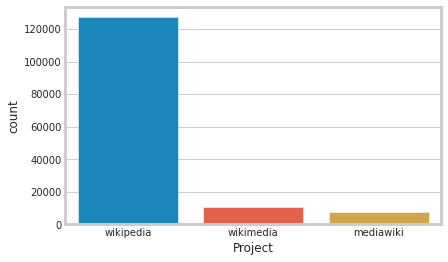

In [ ]:
sns.countplot(train1['Project']);

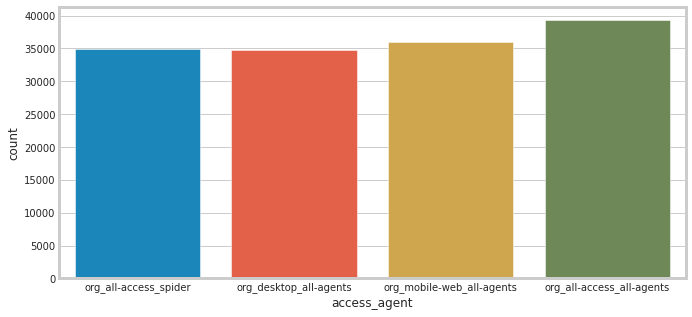

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(train1['access_agent']);

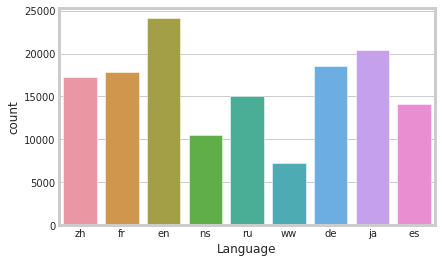

In [ ]:
sns.countplot(train1['Language']);

## Visualize the visits by language

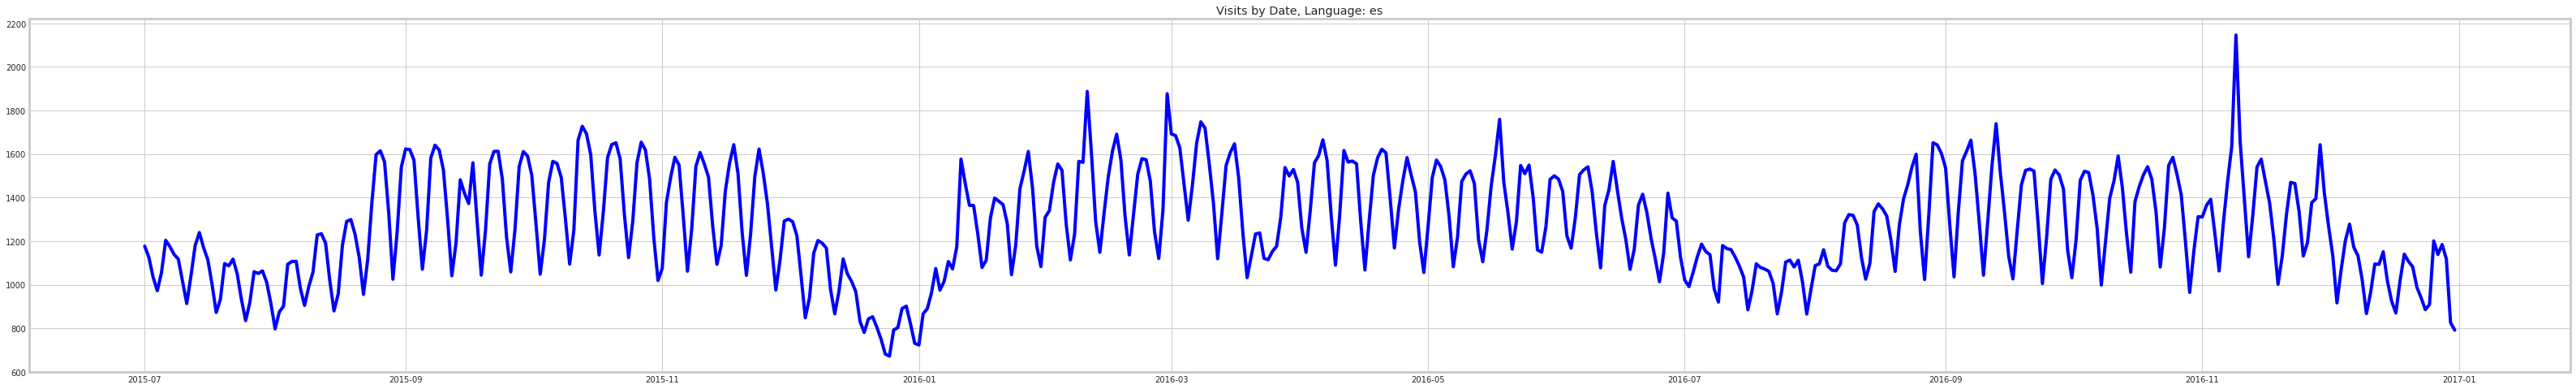

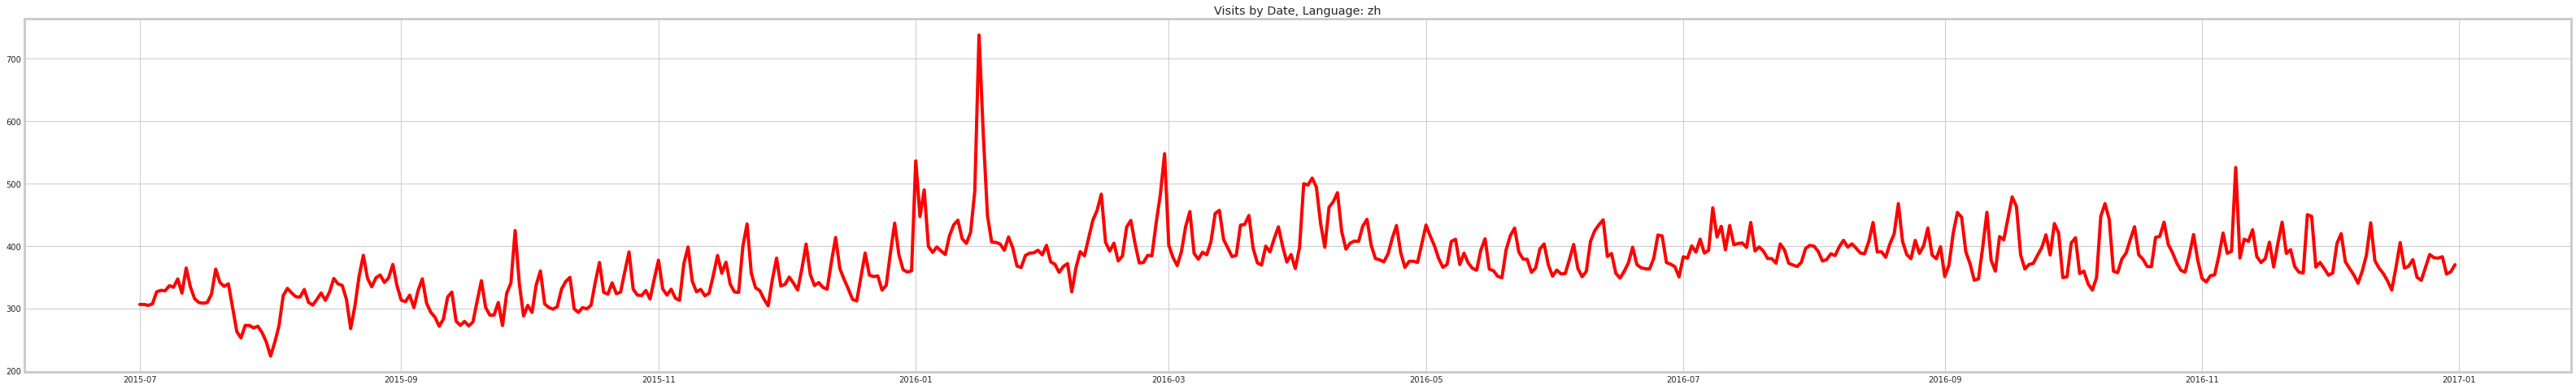

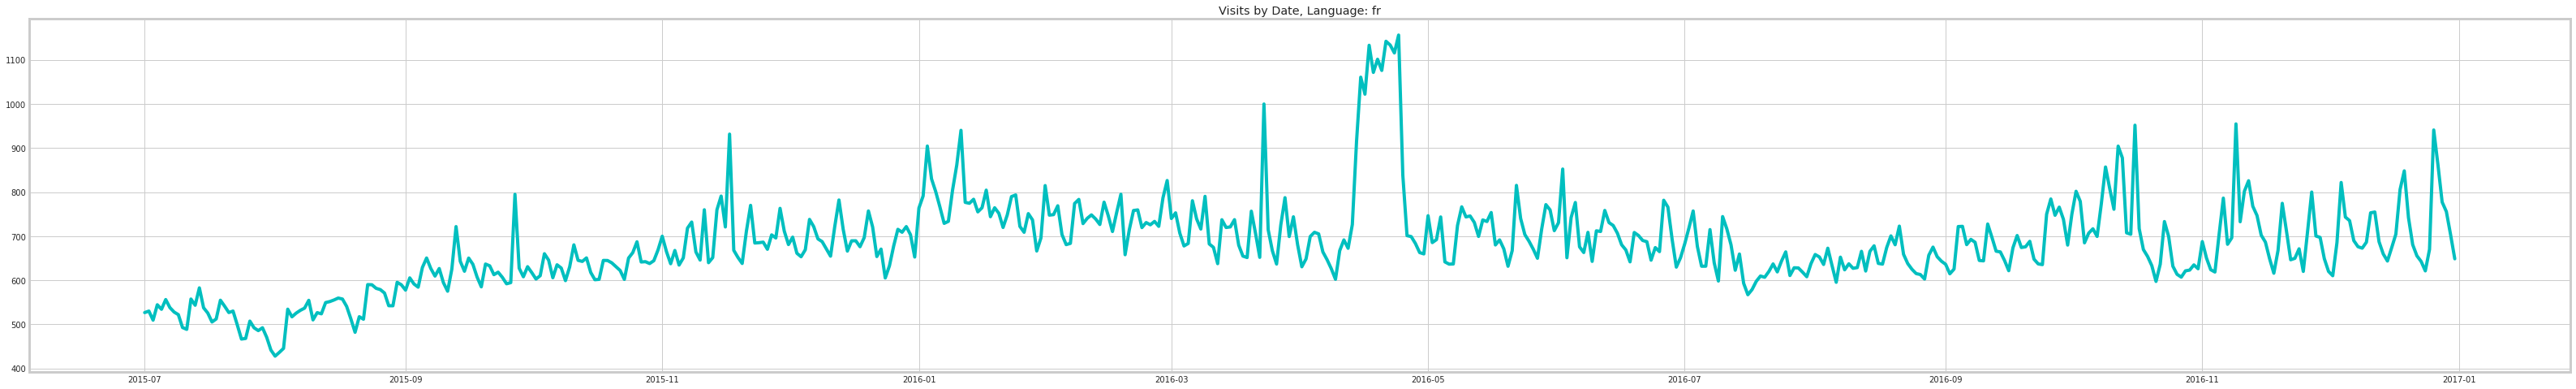

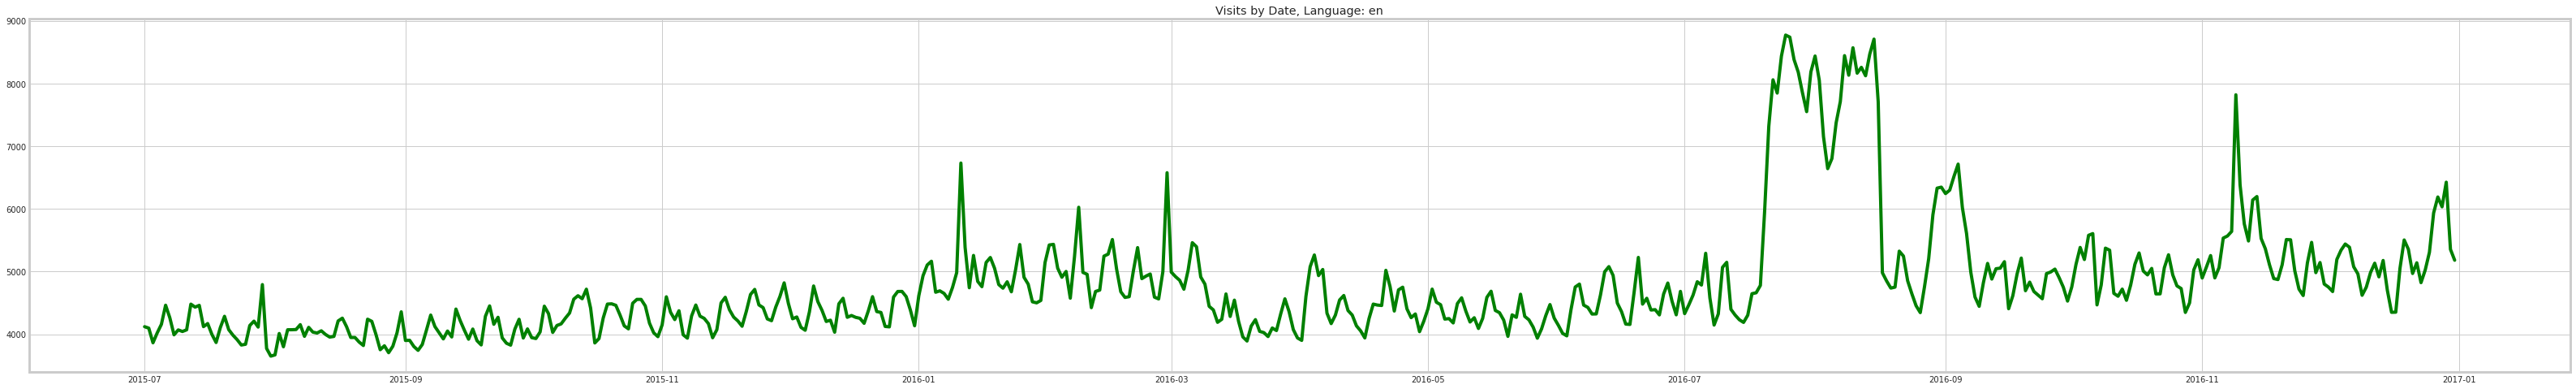

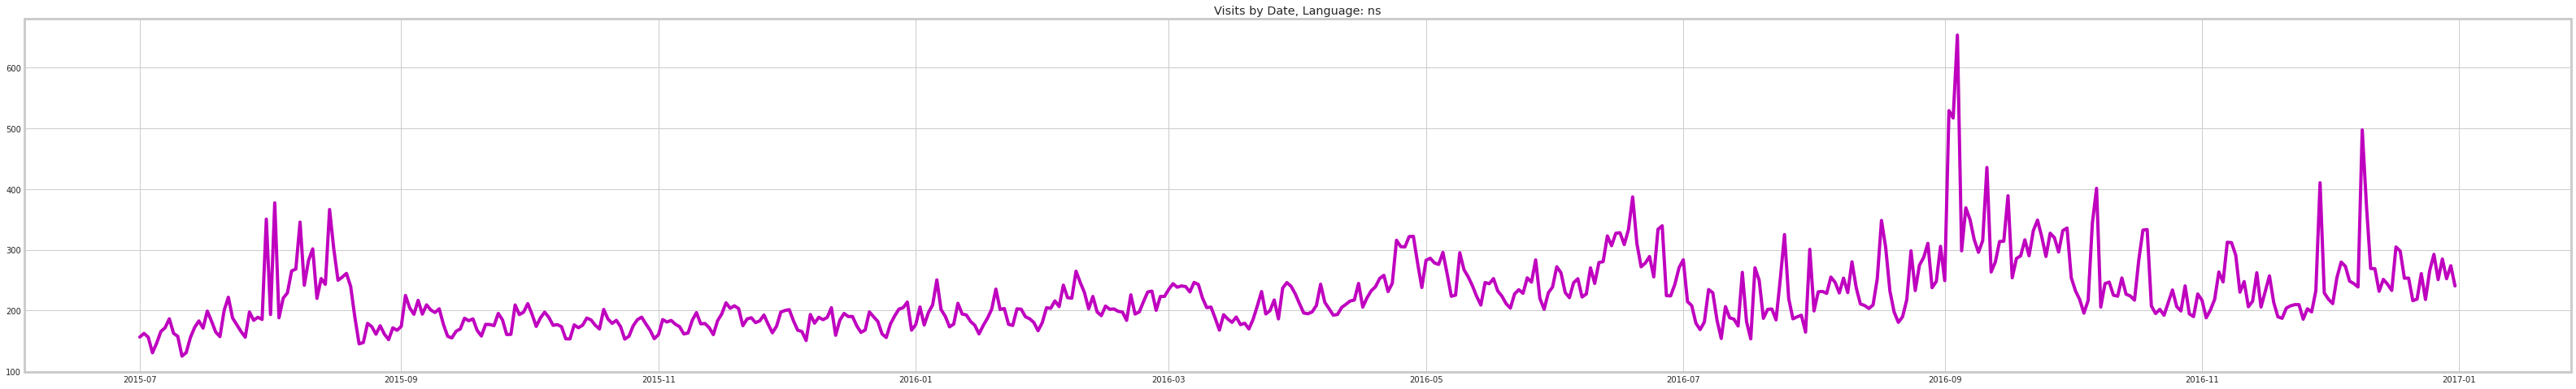

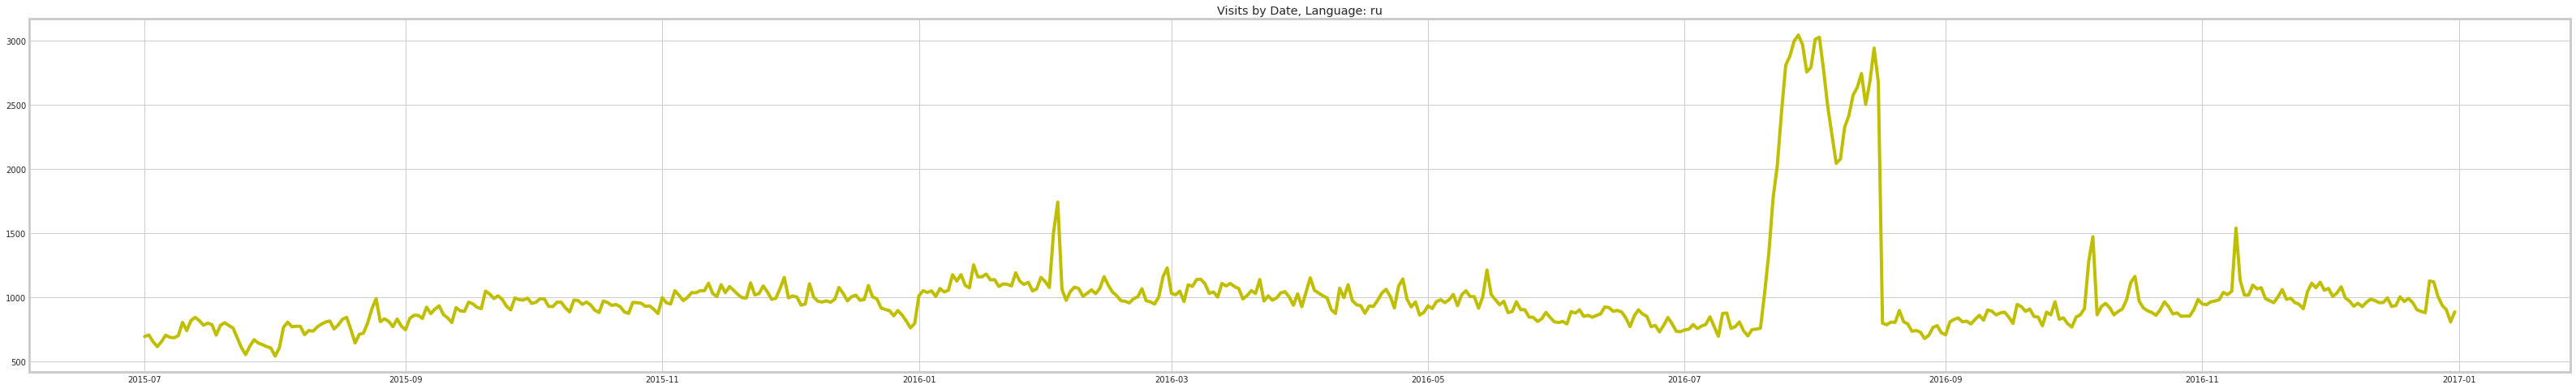

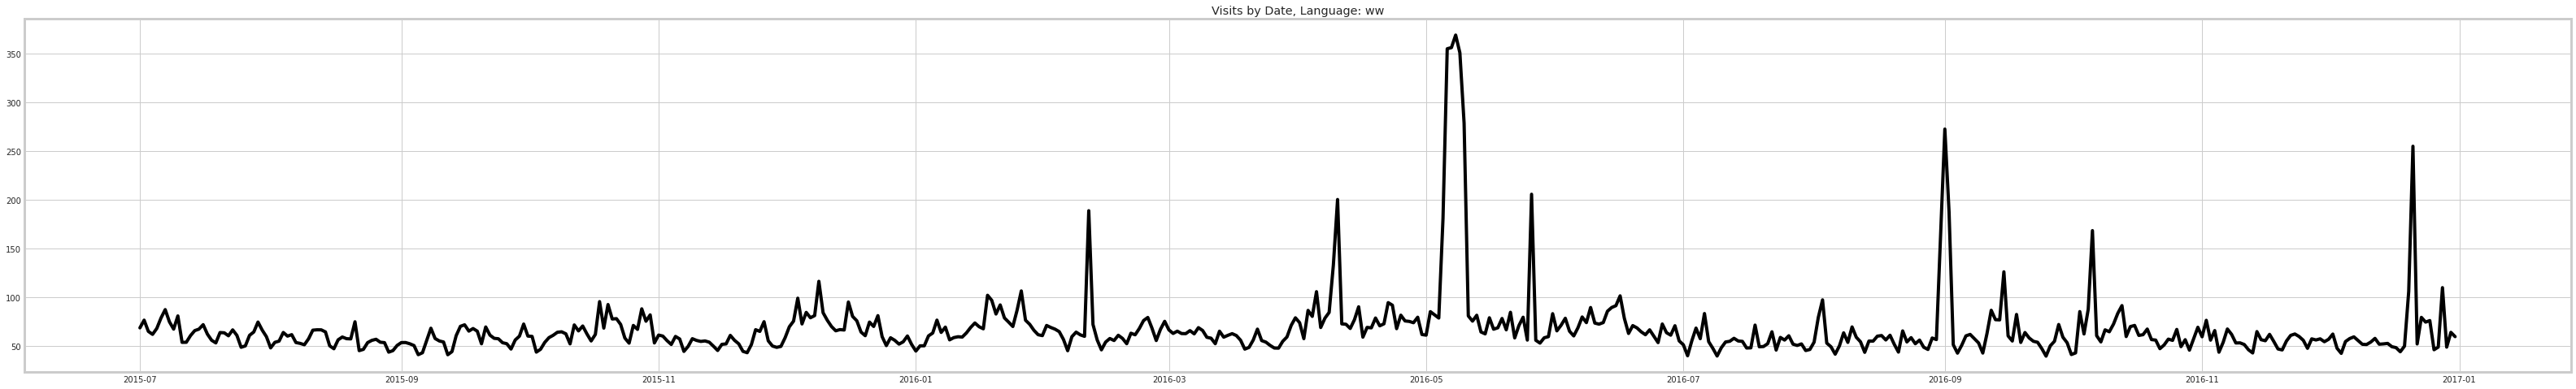

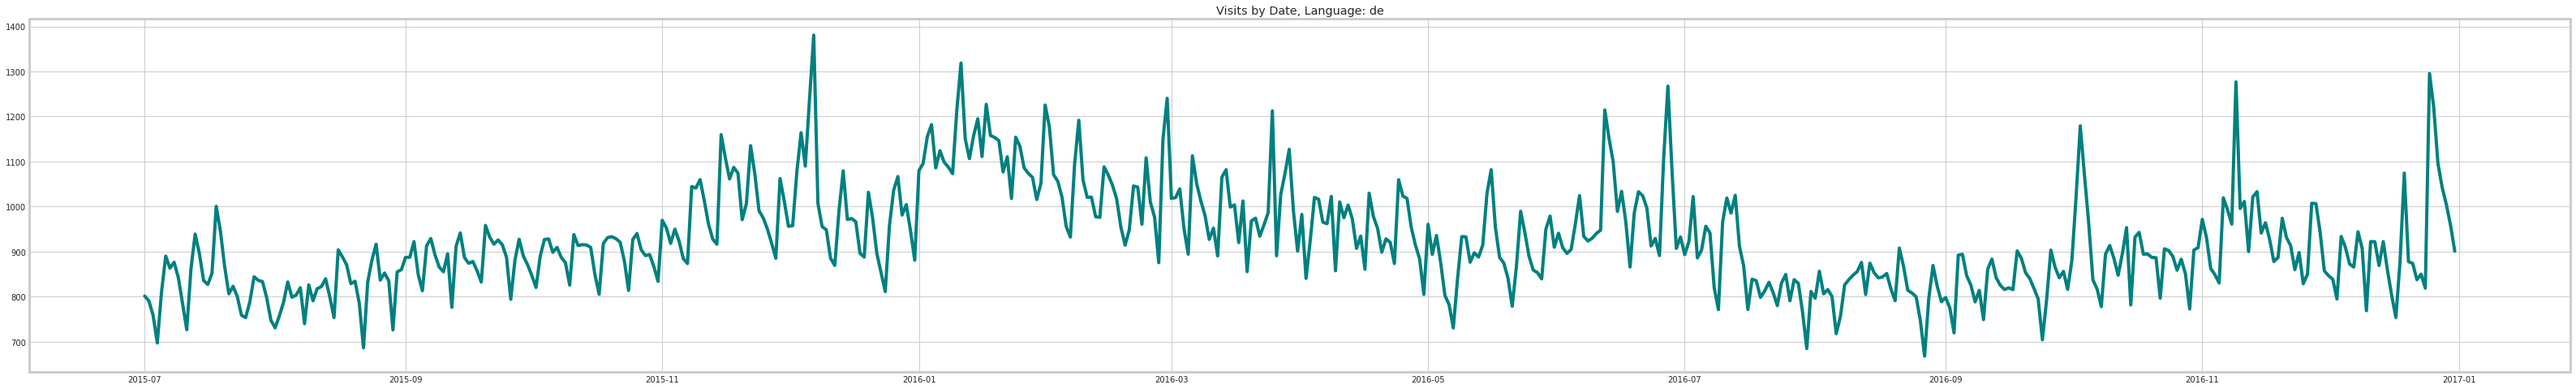

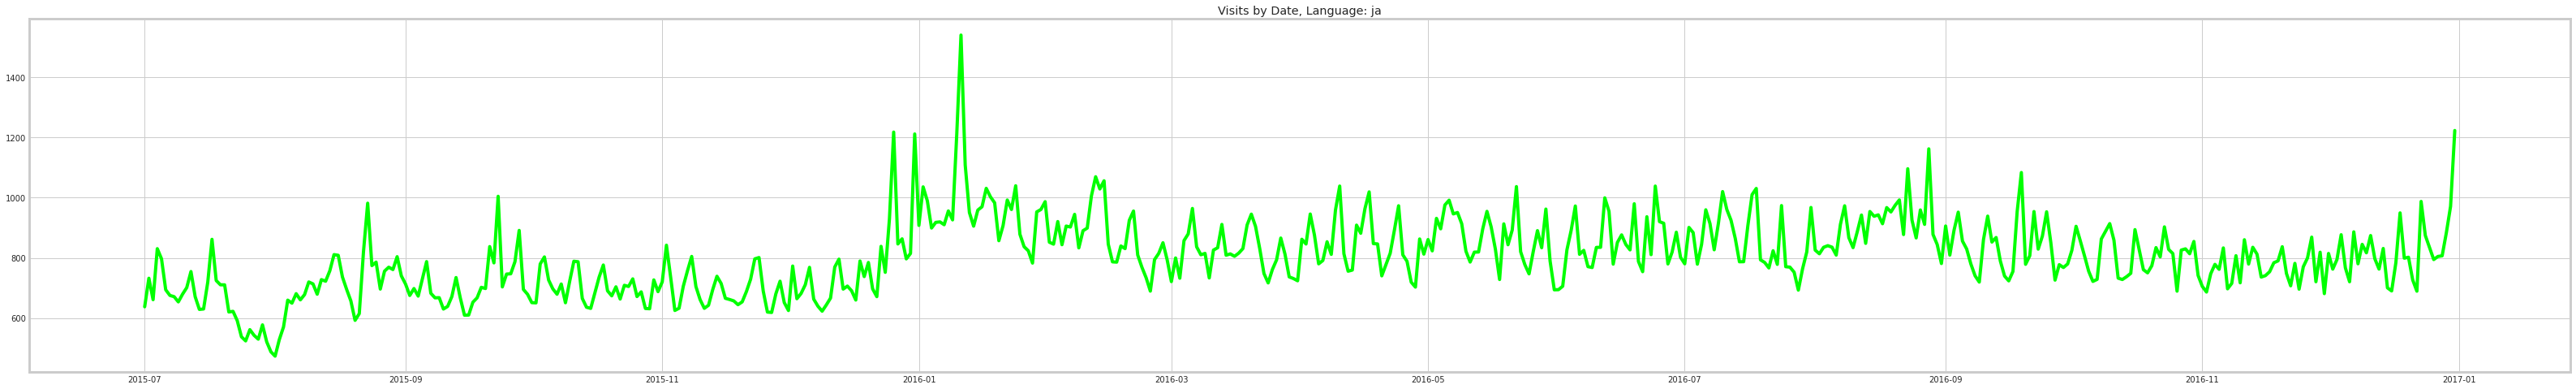

In [ ]:
remove_col = ['Language', 'Name', 'Project', 'access_agent']

# List of languages 
languages = ['es', 'zh', 'fr', 'en', 'ns', 'ru', 'ww', 'de', 'ja']

color = ['b', 'r', 'c', 'g', 'm', 'y', 'k', 'teal', 'lime']
c = 0

for lang in languages:
    
    # create df
    df = train1[train1['Language'] == lang]
    
    # Drop the columns which are not required
    pv = df.drop(remove_col, axis=1)
    
    # Pivot the data for visualization
    pivot = pv.melt(id_vars='Page', var_name='Date', value_name='Visits')
    pivot['Date'] = pd.to_datetime(pivot['Date'])
    
    # Call the function for visualization
    visualize_visits(pivot, 'Date', (50, 8), title=f'Visits by Date, Language: {lang}', color=color[c])
    c += 1

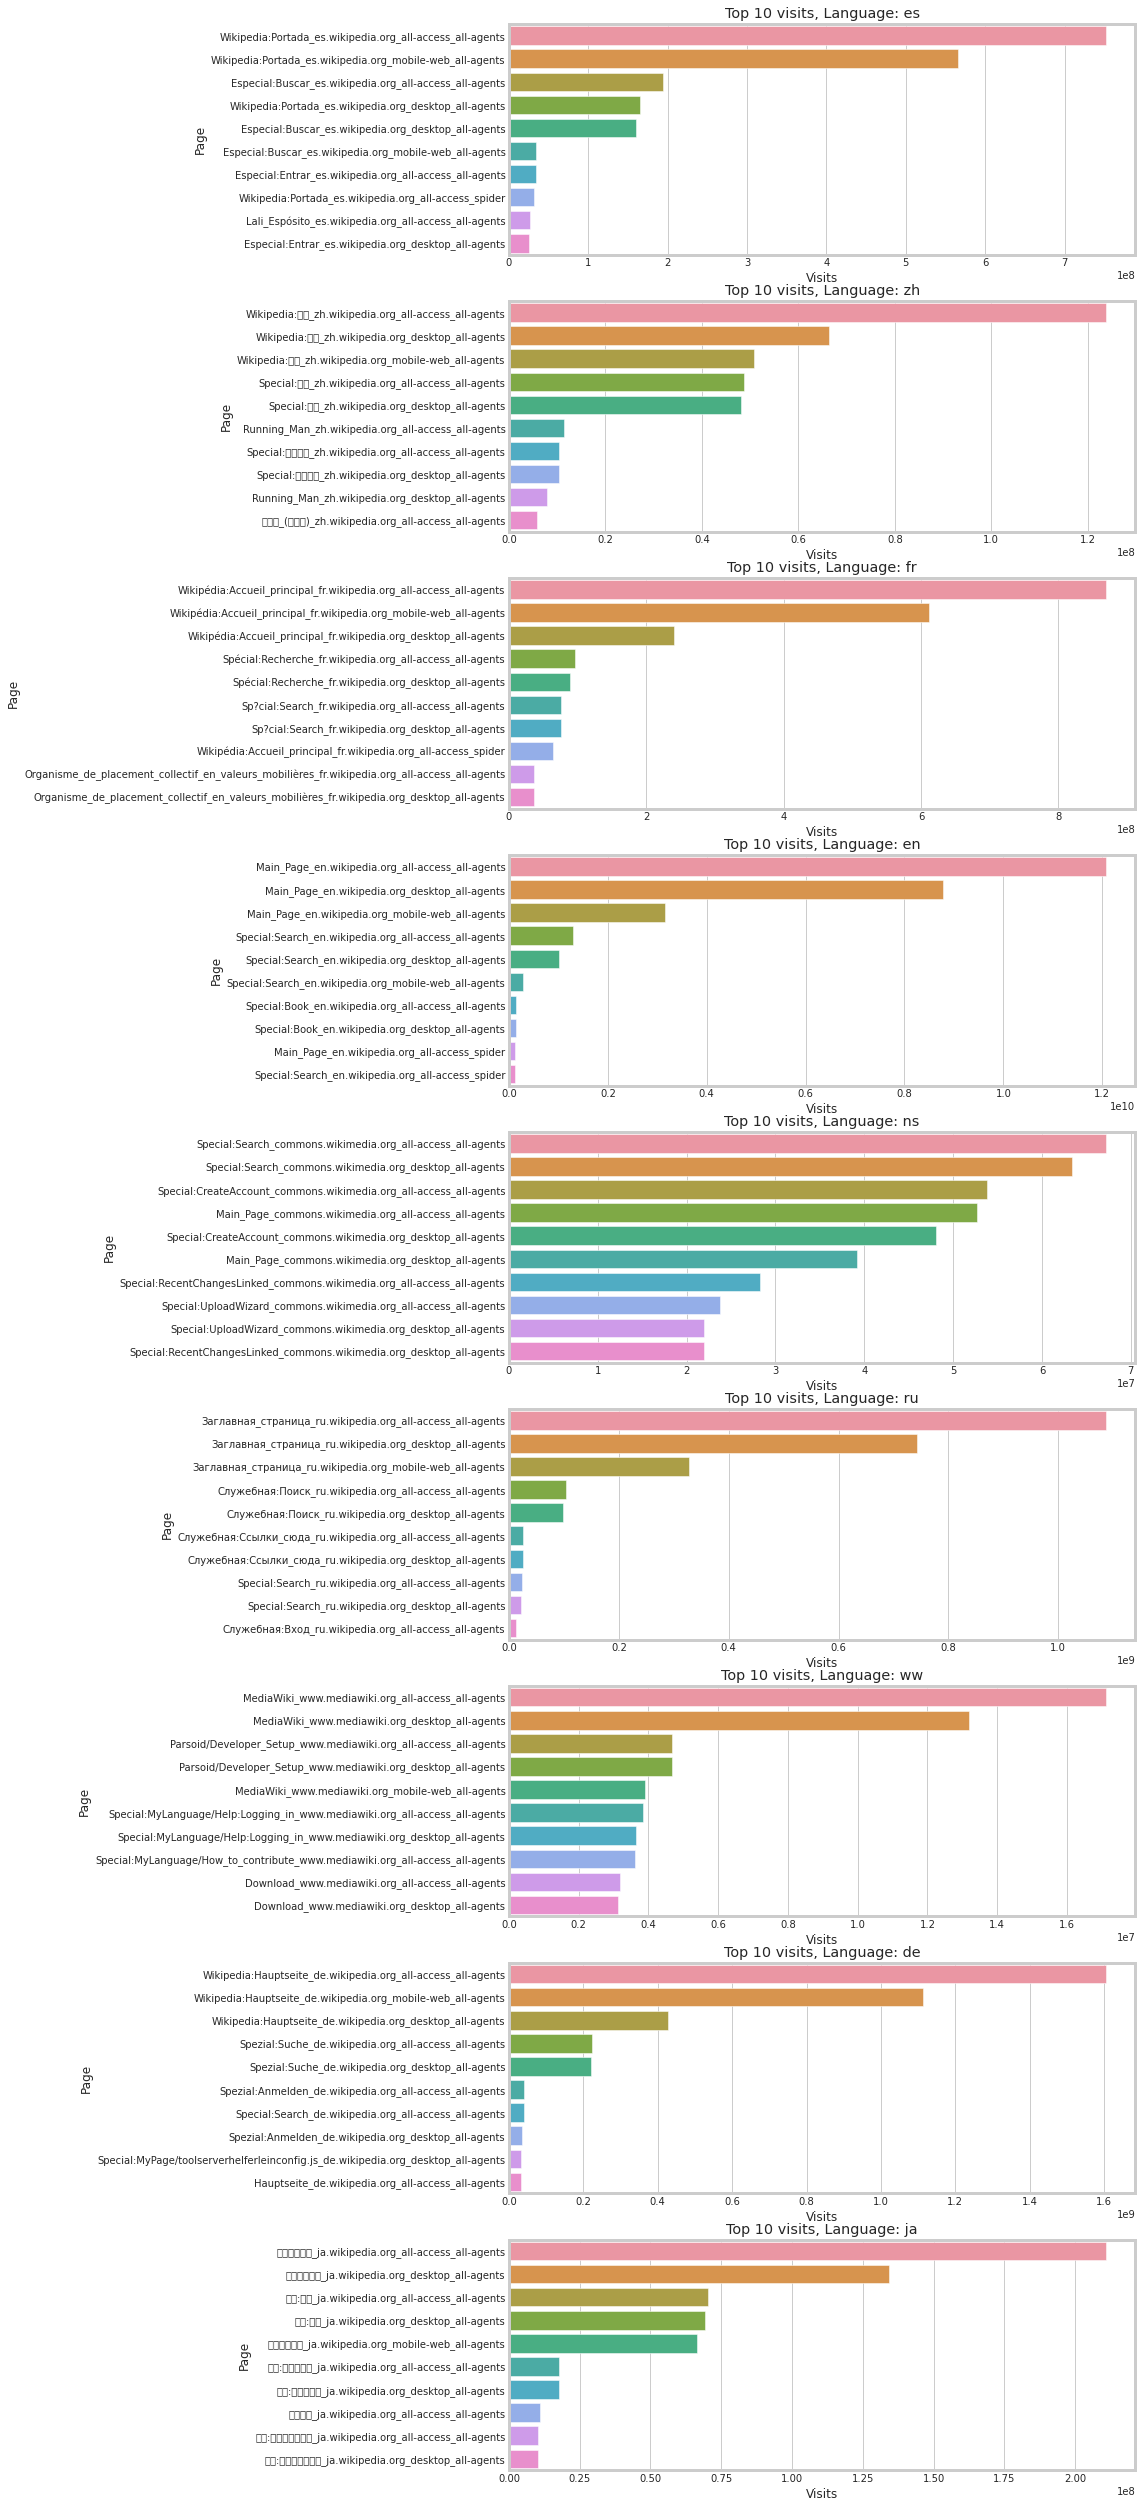

In [ ]:
# Plot the 10 most visited pages according to languages
plt.figure(figsize=(10, 45))

# Top pages to show
top = 10
c = 1

for lang in languages:
    
    # create df
    df_lang = train1[train1['Language'] == lang]
    
    # Drop the columns which are not required
    pv = df_lang.drop(remove_col, axis=1)
    
    # Pivot the data for visualization
    pivot = pv.melt(id_vars='Page', var_name='Date', value_name='Visits')
    pivot['Date'] = pd.to_datetime(pivot['Date'])
    
    # Group the page and sum their visits
    visit_lang = pivot[['Page', 'Visits']].groupby('Page')['Visits'].sum().sort_values(ascending=False)
    visit_lang_df = pd.DataFrame({'Page':visit_lang.index, 'Visits':list(visit_lang)})
    
    # Plot the top visits
    top_visit = visit_lang_df.iloc[:top]
    plt.subplot(9, 1, c)
    title = f'Top {top} visits, Language: {lang}'
    sns.barplot(data=top_visit, y='Page', x='Visits').set_title(title);
    c += 1

## Visualize the sudden increase in visits

From the first figure we can see that, there was sudden increase in number of visits from the date 2016-07 to 2016-09 and the similar increase in visits was also found in figure where the language was en and ru.

<Figure size 720x1440 with 0 Axes>

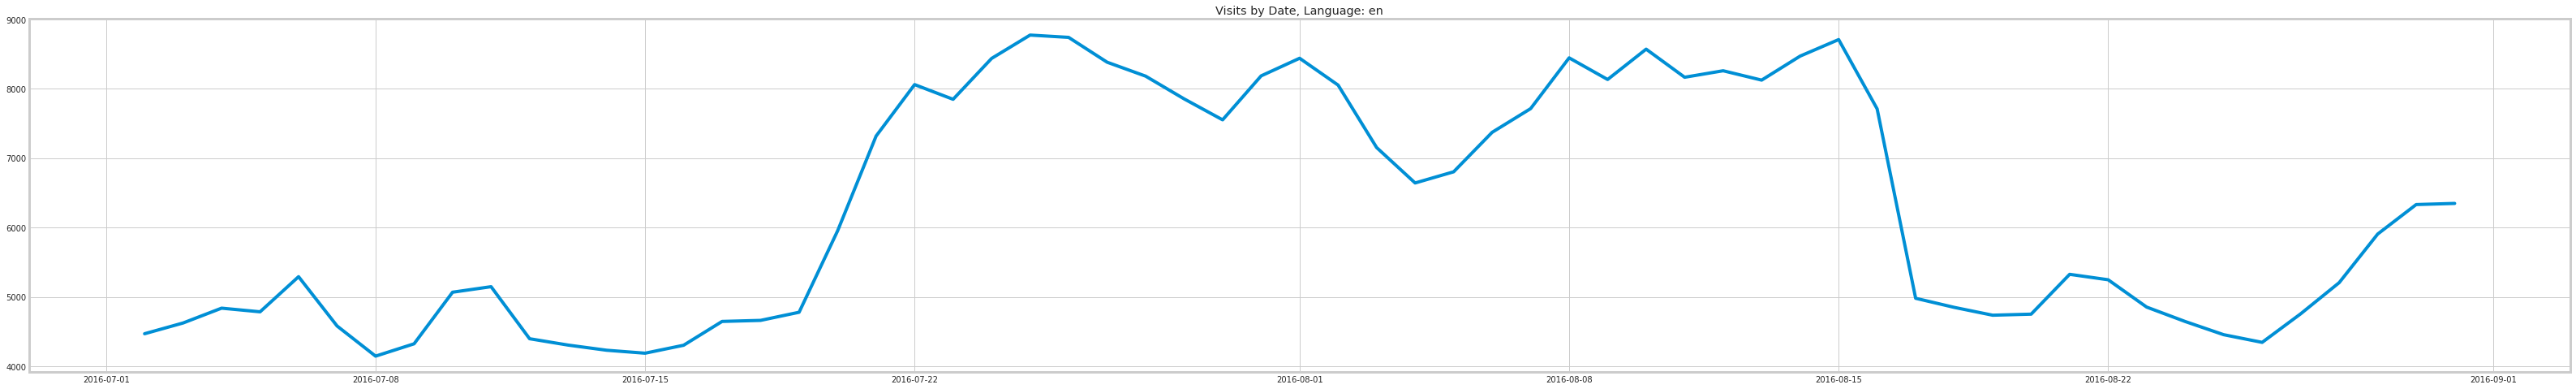

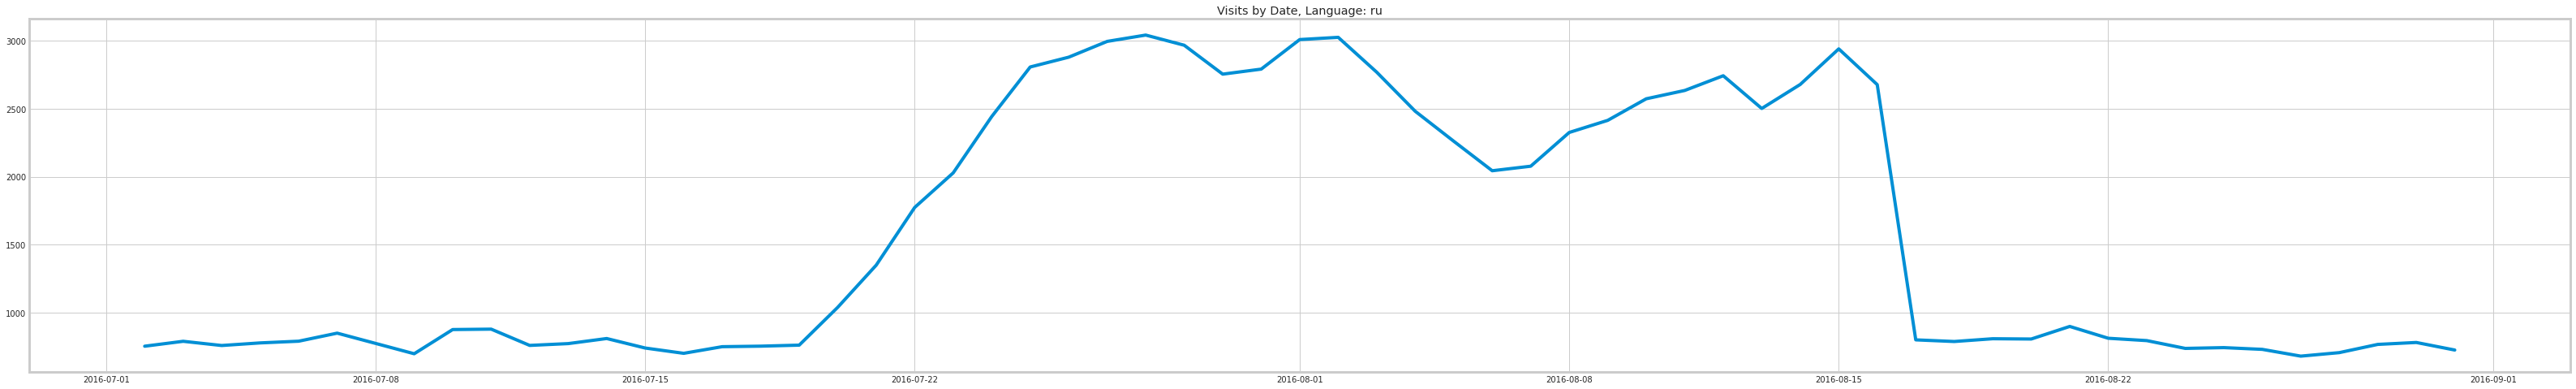

In [ ]:
plt.figure(figsize=(10, 20))
top = 20
c = 1

for lang in ['en', 'ru']:
    
    df = train1[train1['Language'] == lang]
    
    # Drop the columns which are not required
    pv = df.drop(remove_col, axis=1)
    
    # Pivot the data for visualization
    pivot = pv.melt(id_vars='Page', var_name='Date', value_name='Visits')
    pivot = pivot[(pivot['Date'] > '2016-07-01') & (pivot['Date'] < '2016-09-01')]
    pivot['Date'] = pd.to_datetime(pivot['Date'])
    
    visualize_visits(pivot, 'Date', (50, 8), title=f'Visits by Date, Language: {lang}')

For exactly 1 month from the date 2016-07-15 to 2016-08-15 the visits were high, visualizing the top visited pages during this interval

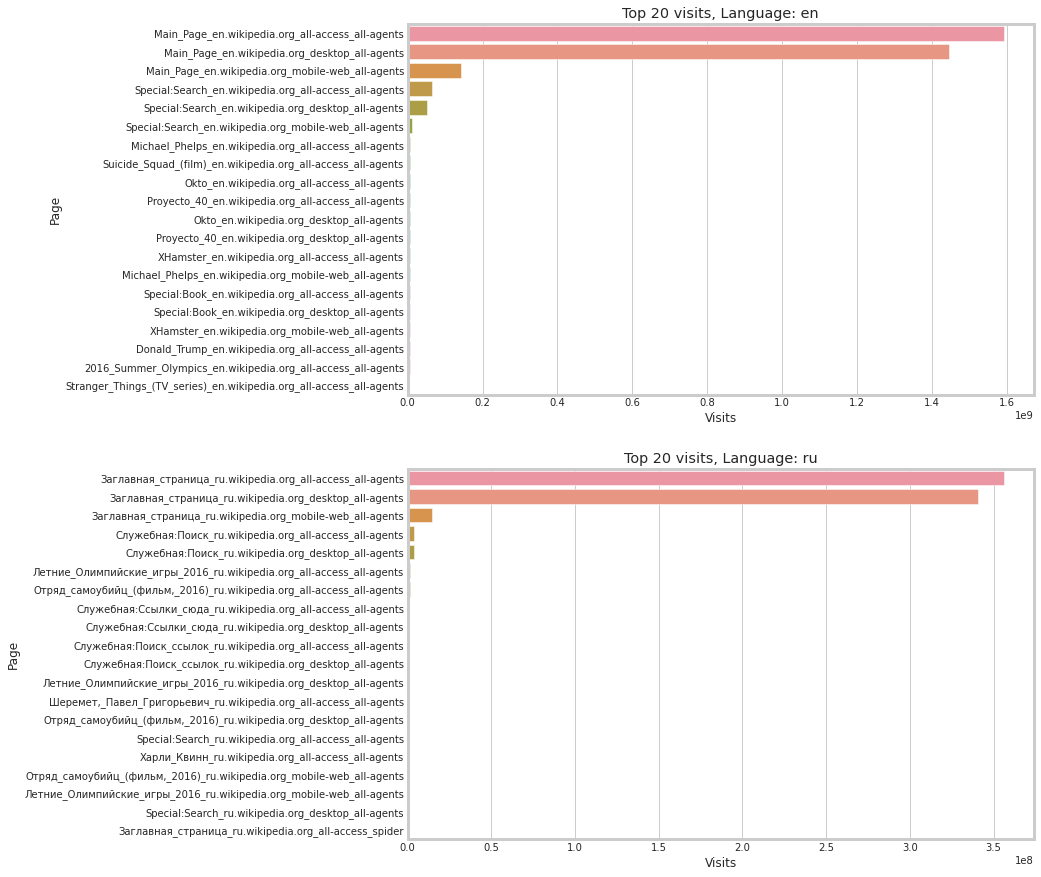

In [ ]:
# Plot the 10 most visited pages according to languages
plt.figure(figsize=(10, 15))

# Top pages to show
top = 20
c = 1

for lang in ['en', 'ru']:
    
    # create df
    df_lang = train1[train1['Language'] == lang]
    
    # Drop the columns which are not required
    pv = df_lang.drop(remove_col, axis=1)
    
    # Pivot the data for visualization
    pivot = pv.melt(id_vars='Page', var_name='Date', value_name='Visits')
    pivot = pivot[(pivot['Date'] > '2016-07-15') & (pivot['Date'] < '2016-08-15')]
    pivot['Date'] = pd.to_datetime(pivot['Date'])
    
    # Group the page and sum their visits
    visit_lang = pivot[['Page', 'Visits']].groupby('Page')['Visits'].sum().sort_values(ascending=False)
    visit_lang_df = pd.DataFrame({'Page':visit_lang.index, 'Visits':list(visit_lang)})
    
    # Plot the top visits
    top_visit = visit_lang_df.iloc[:top]
    plt.subplot(2, 1, c)
    title = f'Top {top} visits, Language: {lang}'
    sns.barplot(data=top_visit, y='Page', x='Visits').set_title(title);
    c += 1

## Auto correlation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
acf = train_pivot[['Date', 'Visits']].groupby('Date')['Visits'].mean()

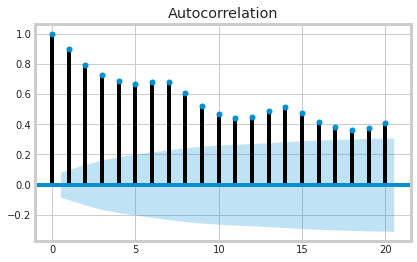

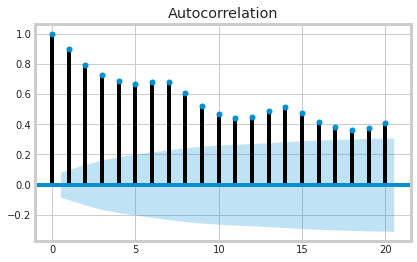

In [ ]:
plot_acf(acf, lags=20)

## Partial Correlation

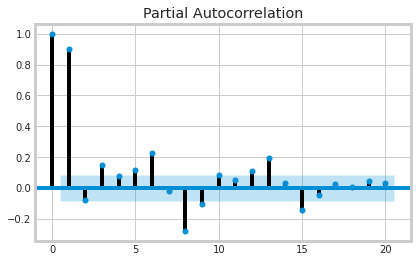

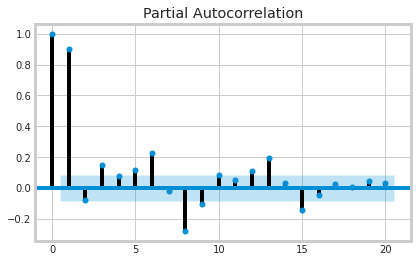

In [ ]:
plot_pacf(acf, lags=20)

Observations:
*   ACF plot - There is a geometric decrease in lags.
*   PACF plot - There is a drop in correlation after 2 lags.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
date_visits = train_pivot[['Date', 'Visits']].groupby('Date')['Visits'].sum().sort_values(ascending=False)
date_visit = pd.DataFrame({'Date':date_visits.index, 'Visits':list(date_visits)})
date_visit.set_index("Date",inplace=True)

In [ ]:
date_visit.sort_index(inplace=True)

In [ ]:
result=seasonal_decompose(date_visit['Visits'], model='multiplicable', freq=30)

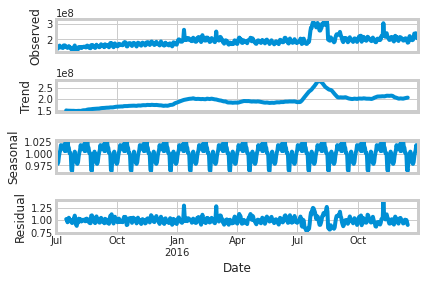

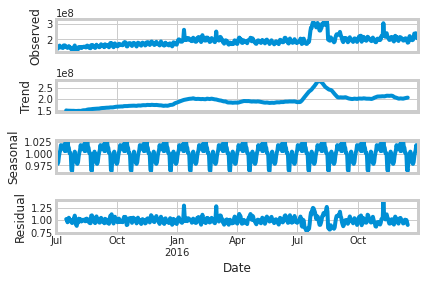

In [ ]:
result.plot()

In [ ]:
train_pivot_expanded = pd.DataFrame(train_pivot)

In [ ]:
name = []
# project = []
# access_agent = []

for page in train_pivot_expanded['Page']:
    split = page.split('.')
    name.append(split[-3])
    # project.append(split[-2])
    # access_agent.append(split[-1])

In [ ]:
train_pivot_expanded['Name'] = name
train_pivot_expanded['Project'] = project
train_pivot_expanded['access_agent'] = access_agent
train_pivot_expanded['Language'] = train_pivot_expanded['Name'].str[-2:]

In [ ]:
train_pivot_expanded.head()

In [ ]:
train_pivot.corr().style.background_gradient(cmap="Blues")

In [ ]:
# Time series EDA frameworks
# decompostion
# stacked charts
# GANNT
# box plots
# heat map
# polar
# stream graph